# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
# This library is useful when you need to work with location-based data and want to associate geographic coordinates with city names for further analysis or visualization tasks.
from citipy import citipy
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#generate random latitude values within a specific range
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list:{len(cities)}")

Number of cities in the list:607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import json
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url= f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url =query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
     #If an error is experienced, skip the city
    except Exception as err:
        print("City not found. Skipping...")
        print(Exception, err)
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

 #Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solwezi
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | palkonda
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | mahabe
City not found. Skipping...
<class 'Exception'> 'coord'
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | quelimane
Processing Record 20 of Set 1 | coari
Processing Record 21 of Set 1 | hawaiian paradise park
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,solwezi,-12.1688,26.3894,77.14,17,2,5.99,ZM,1722846503
1,albany,42.6001,-73.9662,67.89,66,1,5.08,US,1722846233
2,ribeira grande,38.5167,-28.7000,75.78,94,40,10.36,PT,1722846505
3,whitehorse,60.7161,-135.0538,56.17,58,20,4.61,CA,1722846507
4,dudinka,69.4058,86.1778,60.13,42,2,22.15,RU,1722846508


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'output_data/cities.csv'

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,65.01,52,88,14.34,RU,1722764684
1,mount pearl,47.5166,-52.7813,66.54,92,75,14.97,CA,1722764685
2,paulden,34.8856,-112.4682,73.17,65,12,3.00,US,1722764687
3,yellowknife,62.4560,-114.3525,60.42,77,75,5.75,CA,1722764419
4,wailua homesteads,22.0669,-159.3780,77.79,89,20,10.36,US,1722764689


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

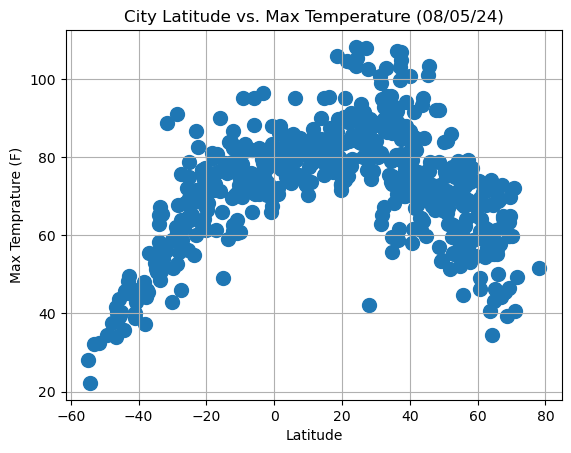

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 100); 

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_to_MaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

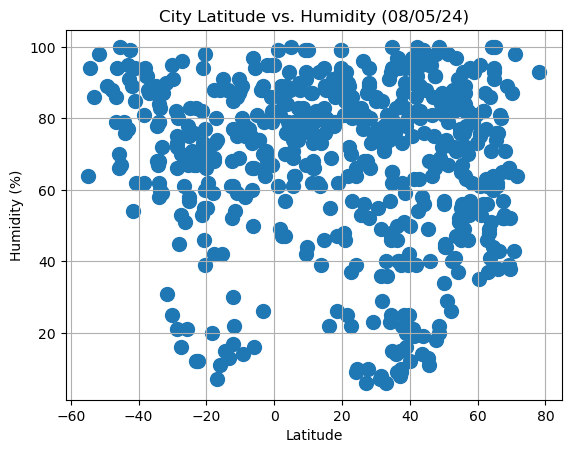

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 100)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
# Save the figure
plt.savefig("output_data/Latitude_to_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

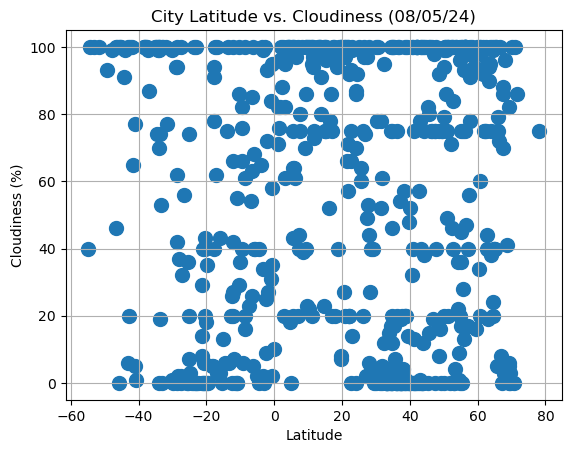

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 100)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_to_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

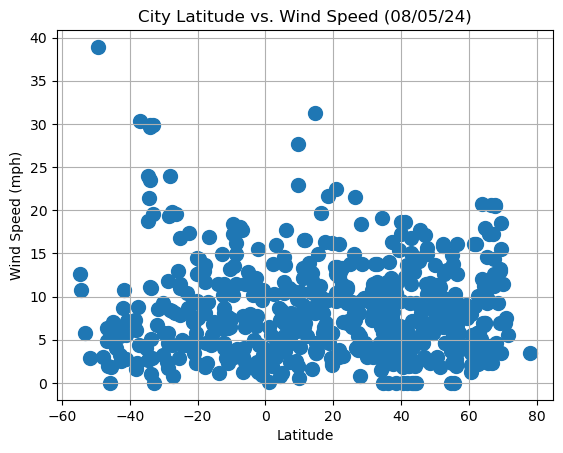

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 100)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_to_Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the linear regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    # Display the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,65.01,52,88,14.34,RU,1722764684
1,mount pearl,47.5166,-52.7813,66.54,92,75,14.97,CA,1722764685
2,paulden,34.8856,-112.4682,73.17,65,12,3.00,US,1722764687
3,yellowknife,62.4560,-114.3525,60.42,77,75,5.75,CA,1722764419
4,wailua homesteads,22.0669,-159.3780,77.79,89,20,10.36,US,1722764689


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,west island,-12.1568,96.8225,82.38,61,42,8.05,CC,1722764691
7,edinburgh of the seven seas,-37.0676,-12.3116,55.54,87,87,30.33,SH,1722764692
8,port-aux-francais,-49.3500,70.2167,34.41,89,93,38.92,TF,1722764693
9,bredasdorp,-34.5322,20.0403,50.49,78,100,18.70,ZA,1722764695
10,santa cruz,-17.8000,-63.1667,72.86,88,40,8.05,BO,1722764696


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5704347535336538


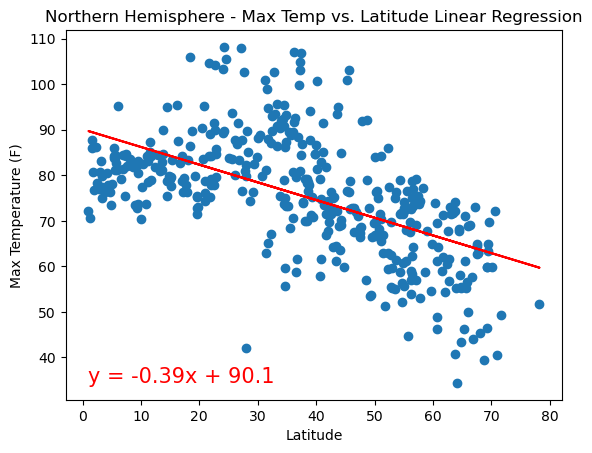

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
x_label = 'Latitude'
y_label = 'Max Temperature (F)'
title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Temperature_to_Latitude Speed 1.png")

The r-value is: 0.821900806871143


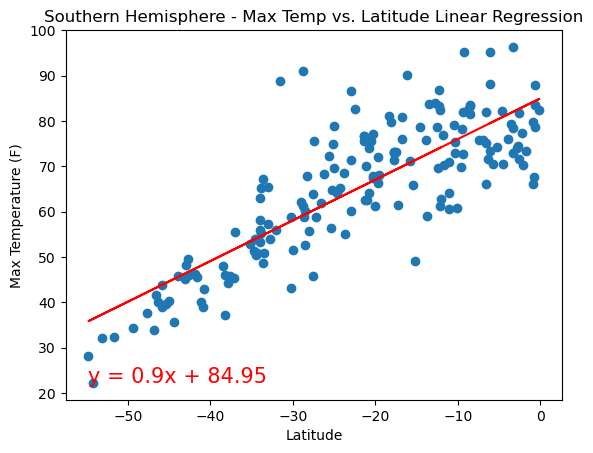

<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
x_label = 'Latitude'
y_label = 'Max Temperature (F)'
title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Temperature_to_Latitude Speed 2.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10682501233642282


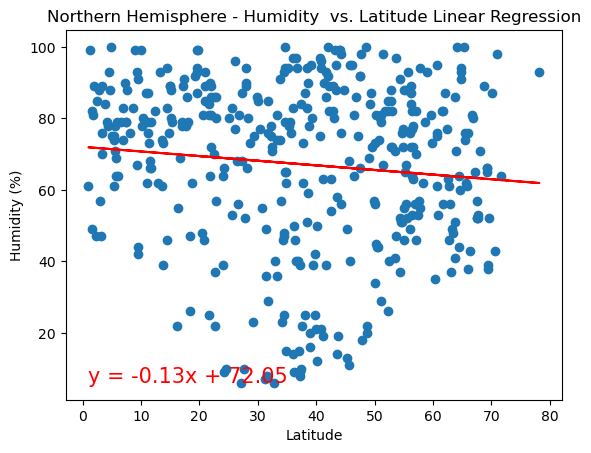

<Figure size 640x480 with 0 Axes>

In [19]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Northern Hemisphere - Humidity  vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Humidity_to_Latitude Speed 1.png")

The r-value is: -0.16544282136939764


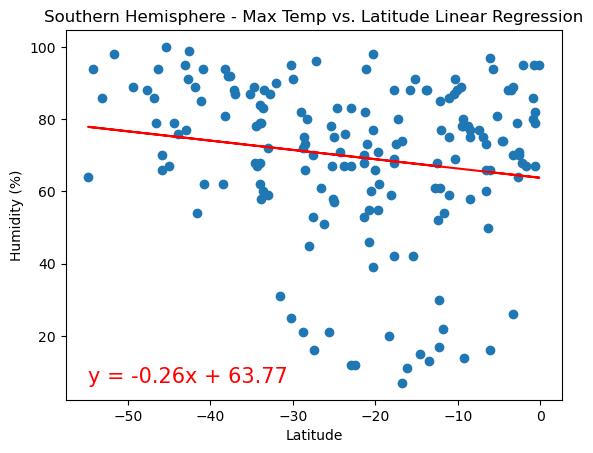

<Figure size 640x480 with 0 Axes>

In [20]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Humidity_to_Latitude Speed 2.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.11005354163877994


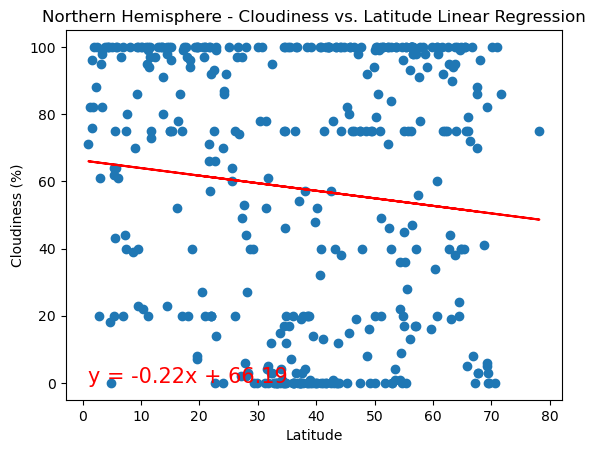

<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Cloudiness_to_Latitude Speed 1.png")

The r-value is: -0.30296018159348653


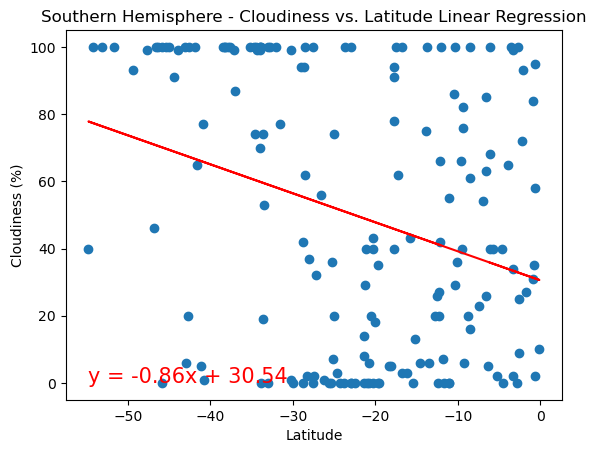

<Figure size 640x480 with 0 Axes>

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Cloudiness_to_Latitude Speed 2.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.005470967560918764


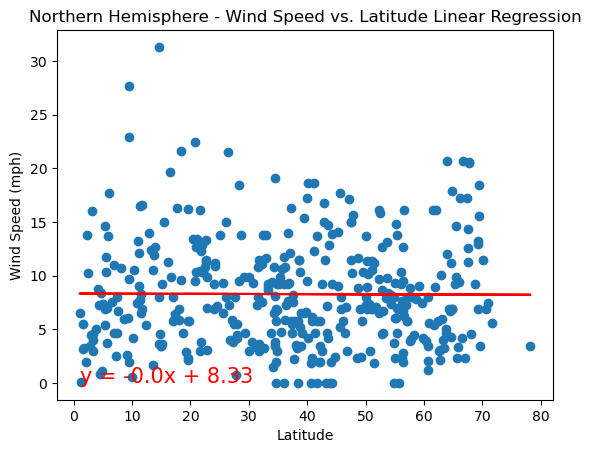

<Figure size 640x480 with 0 Axes>

In [23]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Wind Speed_to_Latitude Speed 1.png")

The r-value is: -0.07305213356912588


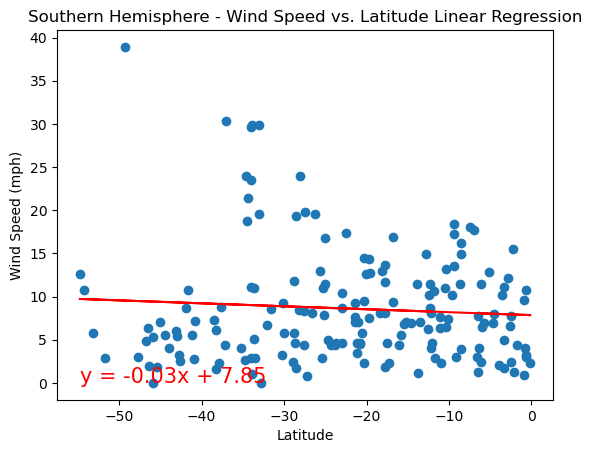

<Figure size 640x480 with 0 Axes>

In [24]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression'
create_linear_regression_plot(x_values, y_values, x_label, y_label, title)
plt.savefig("output_data/Wind Speed_to_Latitude Speed 2.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE